<a href="https://colab.research.google.com/github/nikhilcms/Find-Image-Resolution-using-CNN-Regressor/blob/master/Image_pca_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
face_data = pd.read_csv("/content/drive/My Drive/Akash_project/pca_on_image/faces_file.csv")
back_file = pd.read_csv("/content/drive/My Drive/Akash_project/pca_on_image/back_file.csv")

In [ ]:
face_data.shape, face_data.head()

((2429, 361),
    Pixel1  Pixel2  Pixel3  Pixel4  ...  Pixel358  Pixel359  Pixel360  Pixel361
 0     104     122     142     159  ...       102       109        86        71
 1     112     134     160     172  ...       111       127        98        74
 2      91     109     132     155  ...       134       123        78        83
 3      85      88      88      96  ...       106       139       121        79
 4      91     105     132     145  ...       119       128        96        90
 
 [5 rows x 361 columns])

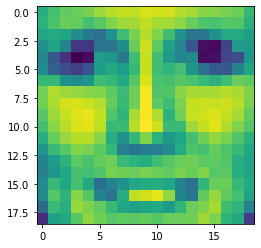

In [ ]:
image = np.array(face_data.loc[np.random.randint(2429)]).reshape(19,19)
plt.imshow(image)

In [ ]:
back_file.shape,back_file.head()

((3699, 361),
    Pixel1  Pixel2  Pixel3  Pixel4  ...  Pixel358  Pixel359  Pixel360  Pixel361
 0      15      12      14      17  ...        65        65        64        65
 1      57      58      55      62  ...       166       163       110       106
 2     138     132     129      95  ...       103       116        76        83
 3     121     115     105     134  ...       136        66        53        79
 4      28      29      32      40  ...        18        20        29        30
 
 [5 rows x 361 columns])

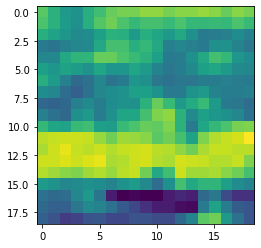

In [ ]:
image2 = np.array(back_file.loc[np.random.randint(3699)]).reshape(19,19)
plt.imshow(image2)

In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize,StandardScaler

In [ ]:
sc = StandardScaler()
standed_data = sc.fit_transform(face_data)

In [ ]:
model = PCA(0.95)
model.fit(face_data)
compress_data = model.transform(standed_data)

In [ ]:
compress_data.shape

(2429, 43)

In [ ]:
print('Covariance Matrix')
print(np.round(model.get_covariance(),2).astype(int))

Covariance Matrix
[[1965 2092 1972 ...  457  312  224]
 [2092 2983 3038 ...  774  543  191]
 [1972 3038 3773 ...  996  735  226]
 ...
 [ 457  774  996 ... 2494 2126 1423]
 [ 312  543  735 ... 2126 2438 1977]
 [ 224  191  226 ... 1423 1977 2497]]


In [ ]:
print('Eigenvalues')
print(np.round(model.explained_variance_,decimals=1))
print('Eigenvectors')
print(np.round(model.components_,decimals=2))

Eigenvalues
[506168.4  98374.1  56352.9  28641.8  25286.3  21869.5  19121.9  13533.1
  11177.2  10141.5   9248.8   7810.1   7093.9   6385.3   5513.2   5331.7
   4934.1   4811.9   4525.8   4455.6   4123.3   3763.2   3621.6   3242.3
   2891.7   2802.2   2492.6   2424.    2272.2   2155.1   2028.5   1979.7
   1919.9   1803.4   1733.8   1649.7   1588.6   1491.6   1453.4   1431.2
   1332.4   1295.9   1255.6]
Eigenvectors
[[ 0.03  0.04  0.06 ...  0.05  0.04  0.02]
 [ 0.03  0.07  0.1  ... -0.05 -0.04 -0.03]
 [-0.05 -0.06 -0.05 ...  0.07  0.08  0.07]
 ...
 [ 0.12  0.04 -0.02 ...  0.11  0.05  0.01]
 [ 0.07  0.04  0.04 ... -0.07 -0.01  0.08]
 [-0.01 -0.   -0.02 ...  0.1   0.06 -0.08]]


In [ ]:
colmn_name = ["principle_component_"+str(i) for i in np.arange(1,44,1)]
principal_df = pd.DataFrame(compress_data,columns = colmn_name)
principal_df.head()

,principle_component_1,principle_component_2,principle_component_3,principle_component_4,principle_component_5,principle_component_6,principle_component_7,principle_component_8,principle_component_9,principle_component_10,principle_component_11,principle_component_12,principle_component_13,principle_component_14,principle_component_15,principle_component_16,principle_component_17,principle_component_18,principle_component_19,principle_component_20,principle_component_21,principle_component_22,principle_component_23,principle_component_24,principle_component_25,principle_component_26,principle_component_27,principle_component_28,principle_component_29,principle_component_30,principle_component_31,principle_component_32,principle_component_33,principle_component_34,principle_component_35,principle_component_36,principle_component_37,principle_component_38,principle_component_39,principle_component_40,principle_component_41,principle_component_42,principle_component_43
0,-2447.163188,-51.715197,-61.073065,38.772219,-142.580198,76.601952,30.703575,-40.453494,-137.269127,67.825162,-77.956617,-60.589795,20.966460,-55.112566,43.008432,-23.217765,74.499992,44.815818,-15.671544,-14.606633,61.222426,8.990796,-51.720229,70.961393,-59.164471,-88.559757,30.541186,-19.574308,-30.306331,0.910892,17.903235,-17.247933,-16.818809,-16.503698,-14.790852,-29.336407,15.745200,19.746316,21.803957,-4.230479,2.493397,-15.694897,-4.388926
1,-2446.397065,-50.472457,-60.861289,40.252458,-144.241953,77.326656,31.019336,-39.955329,-136.869317,67.500346,-78.588219,-60.862906,21.689578,-54.246567,43.694591,-23.388058,74.698484,44.821698,-14.754572,-14.319150,61.680336,8.902402,-51.124172,71.413398,-58.964493,-87.928086,30.331984,-20.314524,-30.748131,0.253846,17.859176,-16.873508,-16.610618,-16.923944,-14.788362,-29.859342,15.920244,20.976949,20.427523,-4.130753,2.264837,-15.665548,-4.605905
2,-2446.490543,-50.383065,-60.337685,40.263487,-144.368572,77.186854,31.279123,-39.772684,-137.673027,66.683030,-77.142689,-60.729909,21.452625,-53.995364,43.896840,-23.039714,75.141311,45.135422,-14.619127,-14.332007,61.258240,8.672272,-51.094901,71.207105,-59.661338,-87.991277,30.013376,-20.488398,-31.414154,0.279552,17.948413,-16.725612,-16.028653,-17.127969,-14.022255,-29.825380,16.345616,21.600883,20.465293,-4.369442,2.709166,-16.424945,-4.039003
3,-2447.371275,-53.007308,-60.488111,39.012804,-141.735950,76.214824,32.412880,-41.338389,-137.942246,67.447691,-77.288578,-59.788315,21.767176,-55.291892,43.627512,-23.386201,74.969769,45.585065,-14.509883,-15.421354,60.296305,8.424152,-50.969333,71.221119,-60.136234,-89.112396,29.798133,-19.834338,-31.257514,-0.221686,16.694886,-16.648553,-16.484089,-16.435538,-14.669822,-29.335314,16.552777,20.398625,21.605194,-4.197766,2.501586,-16.791739,-3.894252
4,-2447.433456,-51.847706,-60.824244,41.168205,-143.381714,76.699359,30.061903,-40.890434,-137.717199,66.785701,-77.634400,-60.127759,21.925687,-54.346086,43.630911,-22.882681,75.062729,45.341584,-15.166981,-14.638595,60.617143,8.914179,-51.392971,70.645489,-59.057840,-87.950361,29.436510,-19.475887,-30.833666,0.402120,18.262491,-17.472430,-16.300405,-16.214489,-14.014987,-30.131351,16.320827,20.573703,21.511003,-4.595895,2.159757,-16.631336,-3.888652


Perform Principal Component Analysis on the faces. Discard the three largest
eigenvalues and plot the graph of the remaining eigenvalues sorted in decreasing
order.

In [ ]:
#====to descard three eigen value means not consider first three principle components and plot remaining eigen value=====#

In [ ]:
updated_principal_df = principal_df
updated_principal_df.shape

(2429, 43)

In [ ]:
old_eigen_val = np.round(model.explained_variance_,decimals=1)
updated_eigen_value = old_eigen_val[3::]         # remove first three eigen value

Text(0.5, 1.0, 'eigen_value_plot')

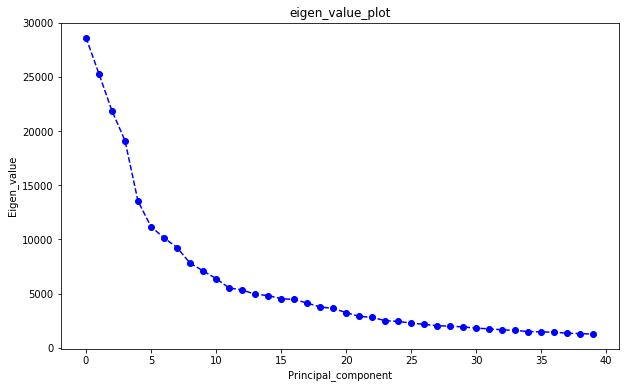

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(updated_eigen_value, linestyle='--', marker='o', color='b')
plt.xlabel("Principal_component")
plt.ylabel("Eigen_value")
plt.title("eigen_value_plot")

question 2: Plot a graph of the coordinates of the faces projected to the 2D plane generated
by the eigenvectors corresponding to the second and third largest eigenvalues.

Text(0.5, 1.0, 'plot against second and third principal components')

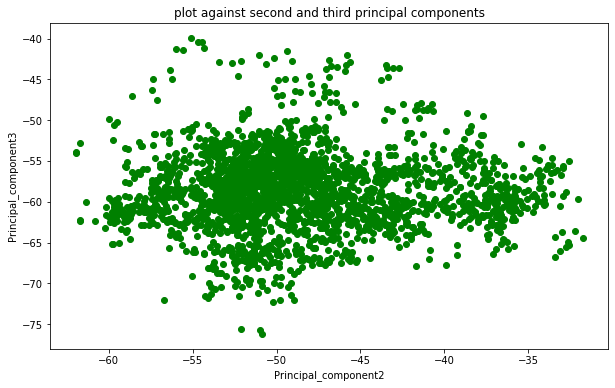

In [ ]:
second_comp = principal_df.iloc[:,1]       # second largest eigen value
third_comp = principal_df.iloc[:,2]      # third larget eigen value
plt.figure(figsize = (10,6))
plt.scatter(second_comp,third_comp,facecolor='green')
plt.xlabel("Principal_component2")
plt.ylabel("Principal_component3")
plt.title("plot against second and third principal components")

q3. On the same graph as b, display the coordinates of the projections from b using
one color (black) and the projections of the background patches on the same
two eigenvectors using another color (e.g. red or light gray). Be sure to subtract
the mean of the faces and project to the eigenvectors of the faces.

In [ ]:
sc = StandardScaler()
standed_data = sc.fit_transform(back_file)
backfile_pca = model.transform(standed_data)
backfile_pca.shape , type(backfile_pca)

((3699, 43), numpy.ndarray)

In [ ]:
backfile_principal_comp = backfile_pca
second_princ_comp = backfile_principal_comp[:,1] # second principal comp of backfile
third_princ_comp = backfile_principal_comp[:,2]  # third principal comp of backfile

Text(0.5, 1.0, 'plot against second and third principal components of face and backgound csv')

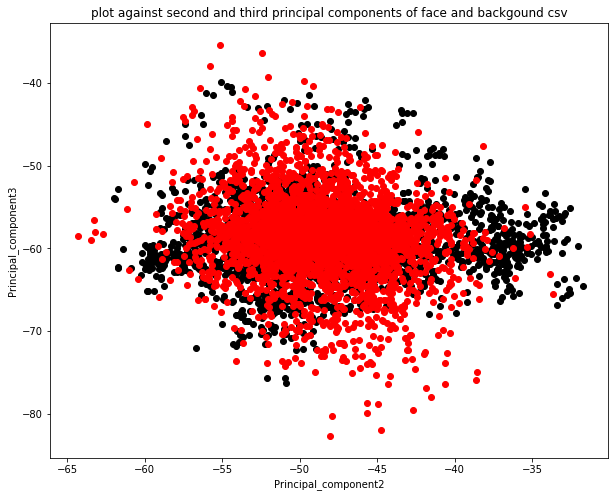

In [ ]:
second_comp = principal_df.iloc[:,1]    # second principal comp of face data
third_comp = principal_df.iloc[:,2]   # third principal comp of backfile
plt.figure(figsize = (10,8))
plt.scatter(second_comp,third_comp,facecolor='black')
plt.scatter(second_princ_comp,third_princ_comp,facecolor='red')
plt.xlabel("Principal_component2")
plt.ylabel("Principal_component3")
plt.title("plot against second and third principal components of face and backgound csv")

Q d. Compute the distances of the faces and the background points to the plane from
b. On the same graph, plot the computed distances (on the y-axis) vs the coor-
dinates of the projections on the largest eigenvector (on the x-axis) for the faces
and background patches using two different colors.

In [ ]:
face_princ_comp = np.array(updated_principal_df)
backfl_princ_comp = backfile_principal_comp


In [ ]:
face_princ_comp.shape ,backfl_princ_comp.shape

((2429, 43), (3699, 43))

In [ ]:
from scipy.spatial import distance
distance.euclidean(face_princ_comp[0],backfl_princ_comp[0])

17.776540877016046

In [ ]:
face_princ_comp[0]

In [ ]:
#===========minimum distance between faces and background file===========#
from scipy.spatial import distance
all_dist = []
for i in range(face_princ_comp.shape[0]):
  dist1 = []
  for j in range(backfl_princ_comp.shape[0]):
    d = distance.euclidean(face_princ_comp[i],backfl_princ_comp[j])
    dist1.append(d)
  all_dist.append(min(dist1))


In [ ]:
#===========minimum distance between faces and background file===========#
from scipy.spatial import distance
all_dist2 = []
for i in range(backfl_princ_comp.shape[0]):
  dist1 = []
  for j in range(face_princ_comp.shape[0]):
    d = distance.euclidean(backfl_princ_comp[i],face_princ_comp[j])
    dist1.append(d)
  all_dist2.append(min(dist1))

Text(0.5, 1.0, 'plot against Pricipal component 1 of faces and background and Distance of faces vs background')

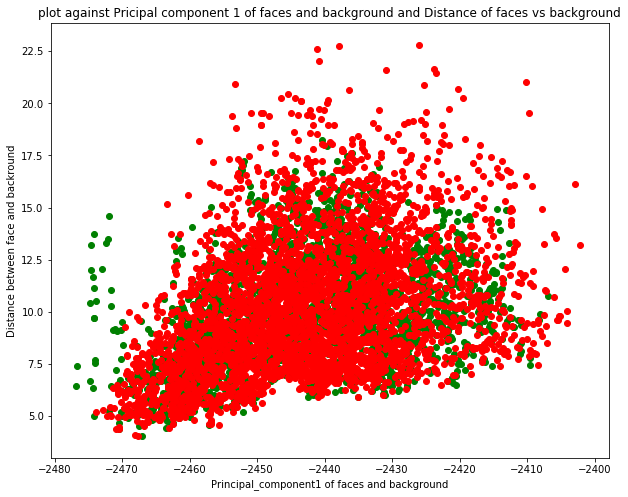

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(face_princ_comp[:,0],all_dist,facecolor='green')   # use first principal component corresponding to largest eigen value
plt.scatter(backfl_princ_comp[:,0],all_dist2,facecolor='red')
plt.xlabel("Principal_component1 of faces and background")  
plt.ylabel("Distance between face and backround")
plt.title("plot against Pricipal component 1 of faces and background and Distance of faces vs background")


Repeat point d displaying the computed distances (on y) vs the coordinates of
the projections on the second largest eigenvector (on x).

Text(0.5, 1.0, 'plot against Pricipal component2 of faces and background and Distance of faces vs background')

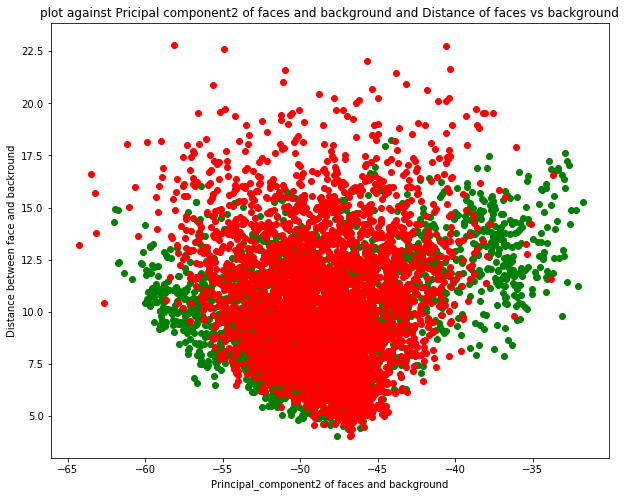

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(face_princ_comp[:,1],all_dist,facecolor='green')   # use first principal component corresponding to largest eigen value
plt.scatter(backfl_princ_comp[:,1],all_dist2,facecolor='red')
plt.xlabel("Principal_component2 of faces and background")  
plt.ylabel("Distance between face and backround")
plt.title("plot against Pricipal component2 of faces and background and Distance of faces vs background")
